## The `groupby` function

Groupby can be used to organize data in specific ways and then apply an aggregator over the data under that organization. Groupby is often done to combine data in different time grouping and common aggregations are mean() or std(). 

This is typically referred to as `split-apply-combine`:

* Split your data into multiple independent groups.
* Apply some function to each group.
* Combine your groups back into a single data object.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

We will read in some sea surface temperature data (SST)

In [2]:
path='/shared/obs/gridded/OISSTv2/monthly/'
file='sst.mnmean.nc'

In [3]:
ds=xr.open_dataset(path+file)
ds

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, nbnds: 2, time: 461)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2020-04-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V

#### Reverse our latitudes

In [4]:
ds=ds.reindex(lat=list(reversed(ds['lat'])))

### We can use `groupby` to make seasonal means

In [5]:
ds_seas=ds.groupby('time.season').mean()
ds_seas

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, season: 4)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    sst      (season, lat, lon) float32 -1.7899978 -1.7899978 ... -1.7899979

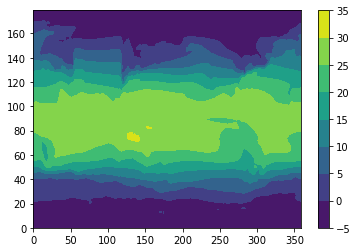

In [6]:
plt.contourf(ds_seas['sst'].sel(season='DJF'))
plt.colorbar()

### Or seasonal standard deviations

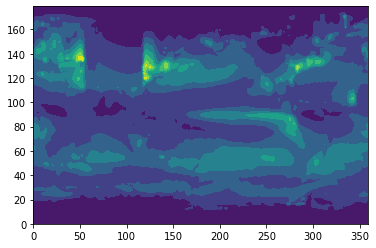

In [7]:
ds_seas_std=ds.groupby('time.season').std()
plt.contourf(ds_seas_std['sst'].sel(season='DJF'))

### We can also groupby other time increments such as `month`

In [8]:
ds_month=ds.groupby('time.month').mean()
ds_month

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, month: 12)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (month, lat, lon) float32 -1.7900007 -1.7900007 ... -1.7900007